In [2]:
# 폰트 문제 해결하기
import platform
import matplotlib.pyplot as plt

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns

%matplotlib inline

In [4]:
price = pd.read_csv("Apartment price.csv", encoding="euc-kr",header=10)
#단위 1,000단위, #2017년 12월을 기준으로 설정

In [5]:
#나중에 '구별' merge 함수 이용하기 위해 엑셀 value가 구별이 아닌 것은 전부 구별로 수정
price.rename(columns={price.columns[0]: '구별'}, inplace=True)

In [6]:
price2 =price.loc[:,['구별','2017년 12월']]

In [7]:
price2.set_index("구별", inplace=True)

In [8]:
divorce = pd.read_csv("divorce.csv", encoding="euc-kr")

In [8]:
divorce.head()

구별  2013결혼  2013이혼  2014결혼  2014이혼  2015결혼  2016이혼  2016결혼  2016이혼.1  \
0  서울평균    2753     805    2593     779    2618     727    2306       711   
1   종로구     877     348     840     341     806     276     760       260   
2    중구     860     320     851     288     916     267     799       249   
3   용산구    1795     450    1560     471    1515     424    1366       441   
4   성동구    2432     613    2125     596    2083     563    1944       547   

   2017결혼  2017이혼  
0    2151     683  
1     700     265  
2     792     253  
3    1357     389  
4    2096     509

In [9]:
divorce2 =divorce.loc[:,['구별','2017결혼','2017이혼']]
divorce2.sort_values(by="2017이혼", ascending=False)

구별  2017결혼  2017이혼
16   강서구    4069    1120
24   송파구    3896    1041
11   노원구    2420    1003
7    중랑구    2302     956
12   은평구    2331     917
21   관악구    3205     817
23   강남구    2677     805
25   강동구    2427     784
17   구로구    2460     775
9    강북구    1436     742
8    성북구    1917     732
15   양천구    2021     700
0   서울평균    2151     683
10   도봉구    1543     666
19  영등포구    2539     628
6   동대문구    1657     624
5    광진구    2082     612
20   동작구    2282     598
14   마포구    2294     576
22   서초구    2288     561
18   금천구    1439     525
4    성동구    2096     509
13  서대문구    1546     485
3    용산구    1357     389
1    종로구     700     265
2     중구     792     253

In [10]:
data_result = pd.merge(price, divorce, on='구별')
data_result2 = data_result.loc[:,['구별','2017년 12월','2017결혼','2017이혼']]
data_result2.head()

구별  2017년 12월  2017결혼  2017이혼
0  종로구     537500     700     265
1   중구     600000     792     253
2  용산구     885000    1357     389
3  성동구     622500    2096     509
4  광진구     700000    2082     612

In [11]:
# 그래프 그리기를 위한 set_index => 구별을 중심
data_result.set_index("구별", inplace=True)

In [12]:
np.corrcoef(data_result['2017년 12월'],data_result['2017이혼'])

array([[ 1.        , -0.12645362],
       [-0.12645362,  1.        ]])

In [13]:
np.corrcoef(data_result['2017년 12월'],data_result['2017결혼'])

array([[1.        , 0.19952159],
       [0.19952159, 1.        ]])

 - 만족스러운 결과를 얻지 못했다. 서울은 구별 인구차이가 꽤 많이나기때문에 1,000 명당 이혼자, 결혼자로 계산을 바꿔야
    구별 아파트 가격차이별 이혼자, 결혼자 데이터값을 구할 수 있을 것으로 보인다.

In [14]:
pop = pd.read_csv("population.csv", encoding="euc-kr",)
#2017년 12월을 기준으로 설정

In [15]:
pop.head()

구별  2017년 12월인구
0  종로구        73594
1   중구        60412
2  용산구       107666
3  성동구       132902
4  광진구       160798

In [16]:
data_result3 = pd.merge(pop, divorce,on='구별')

In [54]:
data_result4 = pd.merge(data_result3, data_result2,on='구별')

In [55]:
data_result4['2017 1000명당 이혼']= data_result3['2017이혼'] / data_result3['2017년 12월인구']*1000

In [56]:
data_result4['2017 1000명당 결혼']= data_result3['2017결혼'] / data_result3['2017년 12월인구']*1000

In [57]:
data_result4

구별  2017년 12월인구  2013결혼  2013이혼  2014결혼  2014이혼  2015결혼  2016이혼  2016결혼  \
0    종로구        73594     877     348     840     341     806     276     760   
1     중구        60412     860     320     851     288     916     267     799   
2    용산구       107666    1795     450    1560     471    1515     424    1366   
3    성동구       132902    2432     613    2125     596    2083     563    1944   
4    광진구       160798    2685     743    2589     713    2576     651    2285   
5   동대문구       159938    2327     740    2123     770    2159     714    1796   
6    중랑구       179132    2813    1040    2769    1105    2716    1028    2591   
7    성북구       187112    2809     934    2415     907    2379     823    2131   
8    강북구       142533    1975     848    1819     831    1715     738    1500   
9    도봉구       137378    2062     801    1791     777    1810     728    1636   
10   노원구       217619    3432    1075    3176    1067    3146     984    2778   
11   은평구       202839    3277    1073    2916     980    2812     948    2573   
12  서대문구       137266    1974     612    1732     538    1722     528    1660   
13   마포구       169408    2986     718    2827     636    3205     613    2588   
14   양천구       176649    2644     910    2490     873    2516     775    2258   
15   강서구       254257    4331    1181    4338    1092    4578    1118    4111   
16   구로구       171570    3357     883    3156     826    3045     817    2674   
17   금천구       106066    1594     623    1556     603    1481     557    1324   
18  영등포구       167355    3086     817    2951     773    2934     726    2609   
19   동작구       172995    3130     658    2962     715    2855     632    2514   
20   관악구       255352    4183    1089    3949    1005    3859     896    3537   
21   서초구       173594    2988     633    2871     626    2846     597    2676   
22   강남구       231612    3591     884    3560     899    3380     852    3032   
23   송파구       264628    4445    1140    4480    1121    4386    1069    4102   
24   강동구       177407    3166     993    2977     924    2753     852    2399   
25  서울평균       168803    2753     805    2593     779    2618     727    2306   

    2016이혼.1  2017결혼_x  2017이혼_x  2017 1000명당 이혼  2017 1000명당 결혼      오차_x  \
0        260       700       265        3.600837        9.511645  0.531849   
1        249       792       253        4.187910       13.109978  0.147271   
2        441      1357       389        3.613025       12.603793  0.007877   
3        547      2096       509        3.829890       15.771019  0.177612   
4        649      2082       612        3.806017       12.947922  0.087345   
5        666      1657       624        3.901512       10.360265  0.361514   
6        933      2302       956        5.336847       12.850859  0.916972   
7        833      1917       732        3.912095       10.245201  0.349458   
8        722      1436       742        5.205812       10.074860  0.833802   
9        670      1543       666        4.847938       11.231784  0.409654   
10       955      2420      1003        4.608973       11.120353  0.194253   
11       947      2331       917        4.520827       11.491873  0.207727   
12       532      1546       485        3.533286       11.262804  0.683348   
13       636      2294       576        3.400076       13.541273  0.566925   
14       821      2021       700        3.962660       11.440767  0.070615   
15      1112      4069      1120        4.404992       16.003493  0.187622   
16       783      2460       775        4.517107       14.338171  0.185598   
17       535      1439       525        4.949748       13.567024  0.551965   
18       693      2539       628        3.752502       15.171342  0.428049   
19       590      2282       598        3.456747       13.191133  0.536027   
20       926      3205       817        3.199505       12.551302  1.073094   
21       565      2288       561        3.231679       13.180179  0.052604   
22       867      2677  

In [9]:
np.corrcoef(data_result['2017년 12월'],data_result3['2017 1000명당 이혼'])

NameError: name 'data_result' is not defined

In [59]:
np.corrcoef(data_result['2017년 12월'],data_result3['2017 1000명당 결혼'])

array([[1.        , 0.16976085],
       [0.16976085, 1.        ]])

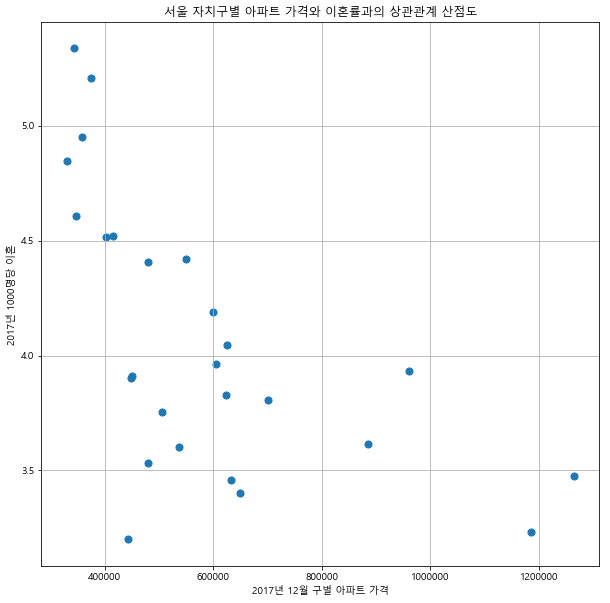

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(data_result2['2017년 12월'], data_result3['2017 1000명당 이혼'], s=50)
plt.xlabel('2017년 12월 구별 아파트 가격')
plt.ylabel('2017년 1000명당 이혼')
plt.title("서울 자치구별 아파트 가격와 이혼률과의 상관관계 산점도")
plt.grid()
plt.show()

In [61]:
# polyfit 함수를 이용해 지정한 특정 차수의 다항식 계수를 계산하고,
fp1 = np.polyfit(data_result['2017년 12월'], data_result3['2017 1000명당 이혼'], 1)
fp1

array([-1.47276004e-06,  4.92429496e+00])

In [62]:
f1 = np.poly1d(fp1) # y축
fx = np.linspace(100000, 1300000, 100) # x축

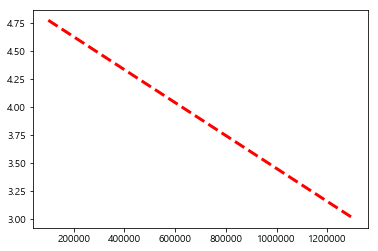

In [63]:

plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')

Accent
Blues
BrBG
BuGn
BuPu
CMRmap
Dark2
GnBu
Greens
Greys
OrRd
Oranges
PRGn
Paired
Pastel1
Pastel2
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Set1
Set2
Set3
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
tab10
tab20
tab20b
tab20c
terrain
winter


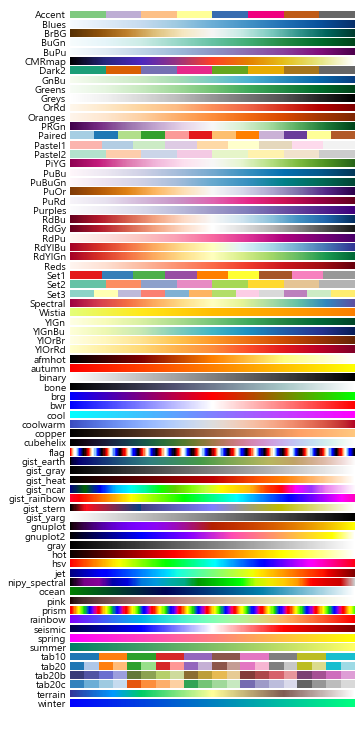

In [64]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0, 1, 256).reshape(1, -1)       # (1, 256)
a = np.vstack((a,a))                            # (2, 256)

# colormap 목록 표시. '_r'로 끝나는 이름은 reverse 버전.
maps = sorted(m for m in plt.cm.datad if not m.endswith('_r'))
nmaps = len(maps) + 1
print(*maps, sep='\n')

fig = plt.figure(figsize=(5, 10))
fig.subplots_adjust(top=0.99, bottom=0.01, left=0.2, right=0.99)

for n, m in enumerate(maps, 1):
    ax = plt.subplot(nmaps, 1, n)
    plt.axis("off")         # 가로축과 세로축에 표시되는 숫자 및 테두리 제거

    plt.imshow(a, aspect='auto', cmap=plt.get_cmap(m), origin='lower')

    # subplot 영역 계산. x, 너비, 높이는 같고, y만 바뀜.
    bounds = list(ax.get_position().bounds)
    x, y, cx, cy = bounds

    # y축에 출력되는 colormap 이름이 y축에 달라붙지 않도록 간격 띄움.
    # 정렬(left, center, right)은 x 좌표가 왼쪽, 가운데, 오른쪽에 있음을 명시하는 것임.
    # right를 줬다면 출력 문자열의 오른쪽에 x 좌표가 오게 된다.
    fig.text(x - 0.01, y, m, fontsize=10, horizontalalignment='right')

plt.show()

In [65]:
# polyfit 함수를 이용해 지정한 특정 차수의 다항식 계수를 계산하고,
fp1 = np.polyfit(data_result2['2017년 12월'], data_result3['2017 1000명당 이혼'], 1)
fp1
# poly1d함수로 그 계수를 사용하여 실제 다항식을 만든다.
f1 = np.poly1d(fp1) # y축
fx = np.linspace(5, 1200000, 100) # x축
data_result4['오차'] = np.abs(data_result4['2017 1000명당 이혼'] - f1(data_result4['2017년 12월']))
df_sort = data_result4.sort_values(by='오차', ascending=False)

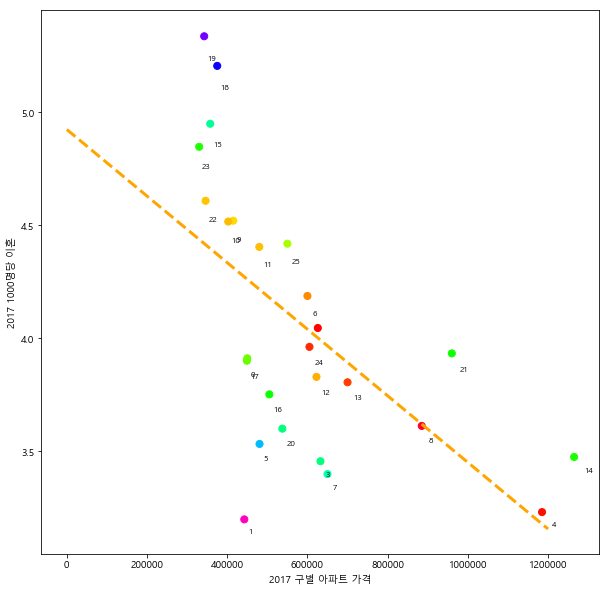

In [66]:
plt.figure(figsize=(10,10))
plt.grid()

plt.xlabel('2017 구별 아파트 가격')
plt.ylabel('2017 1000명당 이혼')

plt.scatter(data_result['2017년 12월'], data_result3['2017 1000명당 이혼'], c=data_result4['오차'], s=50, cmap="gist_rainbow")
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='orange')

for n in range(25):
    plt.text(df_sort['2017년 12월'][n]*1.02, df_sort['2017 1000명당 이혼'][n]*0.98, 
             df_sort.index[n], fontsize=8)
plt.grid()
plt.show()

In [67]:
# polyfit 함수를 이용해 지정한 특정 차수의 다항식 계수를 계산하고,
fp1 = np.polyfit(data_result2['2017년 12월'], data_result3['2017 1000명당 결혼'], 1)
fp1
# poly1d함수로 그 계수를 사용하여 실제 다항식을 만든다.
f1 = np.poly1d(fp1) # y축
fx = np.linspace(5, 1200000, 100) # x축
data_result4['오차2'] = np.abs(data_result4['2017 1000명당 결혼'] - f1(data_result4['2017년 12월']))
df_sort = data_result4.sort_values(by='오차2', ascending=False)

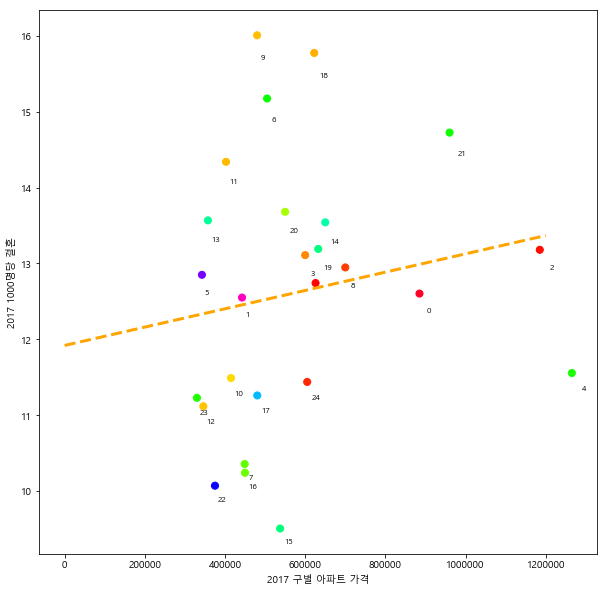

In [68]:
plt.figure(figsize=(10,10))
plt.grid()

plt.xlabel('2017 구별 아파트 가격')
plt.ylabel('2017 1000명당 결혼')

plt.scatter(data_result['2017년 12월'], data_result3['2017 1000명당 결혼'], c=data_result4['오차'], s=50, cmap="gist_rainbow")
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='orange')

for n in range(25):
    plt.text(df_sort['2017년 12월'][n]*1.02, df_sort['2017 1000명당 결혼'][n]*0.98, 
             df_sort.index[n], fontsize=8)
plt.grid()
plt.show()

In [69]:
# 시각화 패키지 matplotlib과 seaborn 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

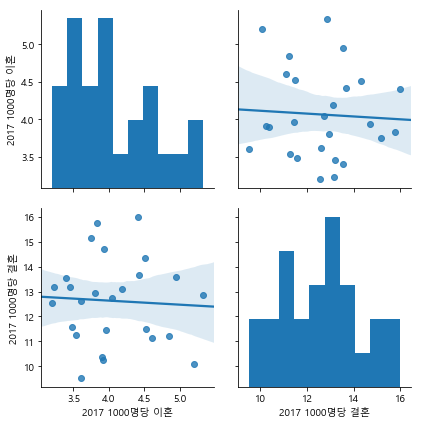

In [72]:
# 강도, 살인, 폭력의 상관관계 분석
sns.pairplot(data_result4, vars=['2017 1000명당 이혼', '2017 1000명당 결혼'],
            kind='reg',size=3)
plt.show()